In [1]:
import matplotlib
matplotlib.use('TkAgg')  # Use Tkinter as the backend for interactivity
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
#function to select points on the images
def select_points(image_path, num_points):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,8))
    plt.imshow(img)
    points = plt.ginput(num_points, show_clicks=True)
    plt.close()
    return points

#function to calculate homography
def cal_homography_matrix(src_points, dst_points):
    A=[]
    for src, dst in zip(src_points, dst_points):
        x, y = src
        x_prime, y_prime = dst
        
        A.append([0,0,0,-x,-y,-1,x*y_prime, y*y_prime, y_prime])
        A.append([-x,-y,-1,0,0,0,x*x_prime, y*x_prime, x_prime])
    A = np.array(A)
    U, S, Vt = np.linalg.svd(A)
    h = Vt[-1]
    H = h.reshape((3,3))
    
    return H



Homography matrices are calculated using the equation 𝐴⋅ℎ=0, where 𝐴 represents the matrix of selected source and destination image points, and ℎ is a vector containing the unknowns of the transformation. When rearranged, this yields the homography matrix between two images.

Question 1 

image1 shows a picture on a wall. Our goal is to replace that picture with image2. 
In order to do this we will compute the H matrix that defines the transformation between the two images and then map image2 in place on image1. 

Several things to consider. You can use the four corner points in each image to setup up the computation of the H matrix and then map every pixel as needed.


In [4]:
dst_path = 'iHW2_mage1.jpg'
src_path = 'HW2_image2.jpg'

dst = cv2.imread(dst_path)
src = cv2.imread(src_path)

src_points = select_points(src_path, 4)
dst_points = select_points(dst_path, 4)

In [5]:
H = cal_homography_matrix(src_points, dst_points)
im_out = cv2.warpPerspective(src, H, (dst.shape[1], dst.shape[0]))
mask = np.ones_like(src, dtype=np.uint8) * 255
warped_mask = cv2.warpPerspective(mask, H, (dst.shape[1], dst.shape[0]))
warped_mask = cv2.cvtColor(warped_mask, cv2.COLOR_BGR2GRAY)

im_dst_ready = cv2.bitwise_and(dst, dst, mask=cv2.bitwise_not(warped_mask))
final_image = cv2.add(im_dst_ready, cv2.bitwise_and(im_out, im_out, mask=warped_mask))

print('H Matrix for 4 points: \n', H.round(3))

H Matrix for 4 points: 
 [[-0.001 -0.    -0.729]
 [ 0.    -0.002 -0.685]
 [ 0.    -0.    -0.001]]


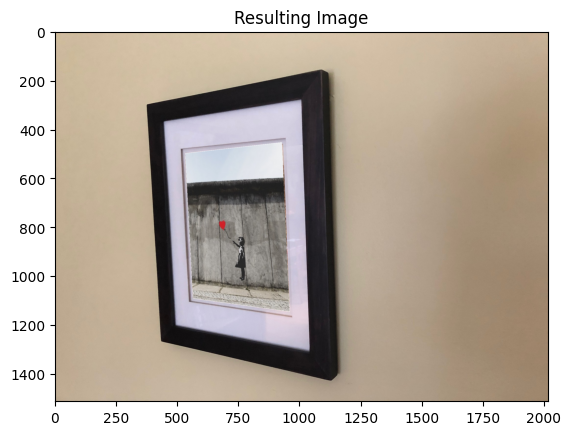

In [6]:
%matplotlib inline
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title("Resulting Image")
plt.show()

The above result image is obtained by hand picking 4 points to replace one image on top of an another.

Question 2. 

Given what we learned about homographies and how they warp images can you pick four additional points from the two images. How would you modify the computation of the H matrix when you have an overconstrained problem (8 points as opposed to 4). Recompute H with these 8 points and comment on the differences in the H matrix. Map another image (of your own – please keep it PG-13) on image1 with this new homography.

In [8]:
matplotlib.use('TkAgg')
dst_path = 'iHW2_mage1.jpg'
src_path = 'HW2_image2.jpg'

dst = cv2.imread(dst_path)
src = cv2.imread(src_path)

src_points = select_points(src_path, 8)
dst_points = select_points(dst_path, 8)

In [9]:
H = cal_homography_matrix(src_points, dst_points)
im_out = cv2.warpPerspective(src, H, (dst.shape[1], dst.shape[0]))
mask = np.ones_like(src, dtype=np.uint8) * 255
warped_mask = cv2.warpPerspective(mask, H, (dst.shape[1], dst.shape[0]))
warped_mask = cv2.cvtColor(warped_mask, cv2.COLOR_BGR2GRAY)

im_dst_ready = cv2.bitwise_and(dst, dst, mask=cv2.bitwise_not(warped_mask))
final_image = cv2.add(im_dst_ready, cv2.bitwise_and(im_out, im_out, mask=warped_mask))

print('H Matrix for 8 points: \n', H.round(3))

H Matrix for 8 points: 
 [[-0.001 -0.    -0.732]
 [ 0.    -0.002 -0.682]
 [ 0.    -0.    -0.001]]


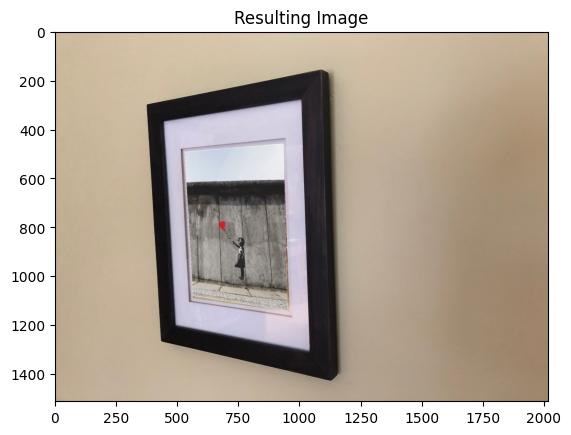

In [10]:
%matplotlib inline
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title("Resulting Image")
plt.show()

When comparing the homography matrices obtained by selecting four points to those obtained with eight points, it is observed that the matrices remain relatively constant.

For own image

In [11]:
matplotlib.use('TkAgg')
dst_path = 'iHW2_mage1.jpg'
src_path = 'img3.jpg'

dst = cv2.imread(dst_path)
src = cv2.imread(src_path)

src_points = select_points(src_path, 8)
dst_points = select_points(dst_path, 8)

In [12]:
H = cal_homography_matrix(src_points, dst_points)
im_out = cv2.warpPerspective(src, H, (dst.shape[1], dst.shape[0]))
mask = np.ones_like(src, dtype=np.uint8) * 255
warped_mask = cv2.warpPerspective(mask, H, (dst.shape[1], dst.shape[0]))
warped_mask = cv2.cvtColor(warped_mask, cv2.COLOR_BGR2GRAY)

im_dst_ready = cv2.bitwise_and(dst, dst, mask=cv2.bitwise_not(warped_mask))
final_image = cv2.add(im_dst_ready, cv2.bitwise_and(im_out, im_out, mask=warped_mask))

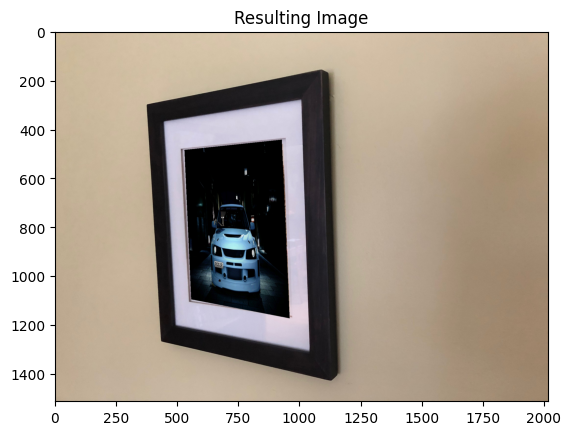

In [13]:
%matplotlib inline
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title("Resulting Image")
plt.show()

Question 3 

Can you now take multiple images (five?) and stitch them together into a mosaic. Try and stand in a spot and rotate the camera to take multiple overlapping images and then compute the homographies and map the images onto each other while blending them. 

For this assignment, the outdoor images were sourced from the internet.

FUNCTION DEFINITIONS

In [37]:
#function to select points
def select_points(image, num_points):
    matplotlib.use('TkAgg')
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img)
    points = plt.ginput(num_points, show_clicks=True, timeout=50)
    plt.close()

    return points

#function to calculate homography
def cal_homography_matrix(src_points, dst_points):
        
    A=[]
    
    for src, dst in zip(src_points, dst_points):
        x, y = src
        x_prime, y_prime = dst
        
        A.append([0,0,0,-x,-y,-1,x*y_prime, y*y_prime, y_prime])
        A.append([-x,-y,-1,0,0,0,x*x_prime, y*x_prime, x_prime])
        
        
    A = np.array(A)
    U, S, Vt = np.linalg.svd(A)
    h = Vt[-1]
    H = h.reshape((3,3))
    
    return H

#applying homography
def apply_homography(img, H, output_shape):
    warped_img = cv2.warpPerspective(img, H, output_shape)
    return warped_img

#blending images
def blend_images(img1, img2, alpha,beta, mask=None):
    if mask is not None:
        img2 = cv2.bitwise_and(img2, img2, mask=mask)
    blended = cv2.addWeighted(img1, alpha, img2, beta, 0)
    return blended

#add canvas to each image
def add_border_cv(input_image_path, top, bottom, left, right, color=[255, 255, 255]):
    # Read the image
    img = cv2.imread(input_image_path)

    # Check if image loading is successful
    if img is None:
        print("Error: Image not found.")
        return

    # Add border around the image
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return img_with_border

#extending the image borders to fit the blending of wrapped images
def add_border_img(img, top, bottom, left, right, color=[255, 255, 255]):

    # Check if image loading is successful
    if img is None:
        print("Error: Image not found.")
        return

    # Add border around the image
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return img_with_border


IMAGE PATHS

In [38]:
# List of image paths
image_paths = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
images = []

#LIST of images
for path in image_paths:
    images.append(add_border_cv(path, 2000,2000,2000,2000, [0,0,0]))


The program starts with taking a center image (i.e. image 3.jpg in this case) and wraping and blending the other images from it. First we select and store points from two images, it is wrapped accordingly, and blended. Each image is blended this way with the resulting image obtained in the previous iteration.

In [39]:

points_23 = []
points_23.append(select_points(images[1], 4))
points_23.append(select_points(images[2], 4))
H_23 = cal_homography_matrix(points_23[0],points_23[1])

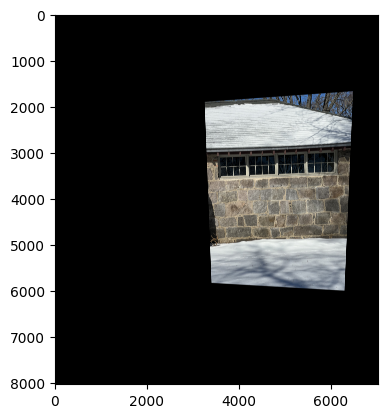

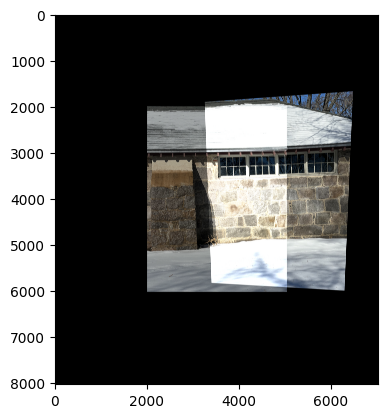

In [40]:
#wraping and blending of images

output_shape_23 = (images[2].shape[1],images[2].shape[0])
warped_image_23 = apply_homography(images[1],H_23,output_shape_23)
%matplotlib inline
plt.figure()
plt.imshow(cv2.cvtColor(warped_image_23,cv2.COLOR_BGR2RGB))
plt.show()

blended_23 = blend_images(warped_image_23, images[2], 1,0.7)
%matplotlib inline
plt.figure()
plt.imshow(cv2.cvtColor(blended_23, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
points_234 = []
points_234.append(select_points(images[3],4))
points_234.append(select_points(blended_23,4))
H_234 = cal_homography_matrix(points_234[0],points_234[1])

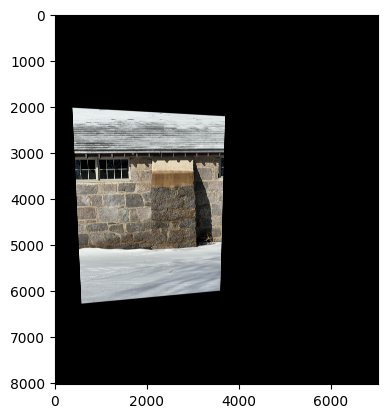

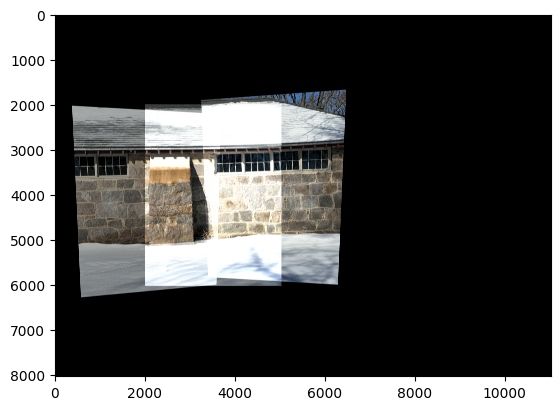

In [42]:
#wraping and blending of images
output_shape_234 = (blended_23.shape[1],blended_23.shape[0])
warped_image_234 = apply_homography(images[3],H_234,output_shape_234)
%matplotlib inline
plt.figure()
plt.imshow(cv2.cvtColor(warped_image_234,cv2.COLOR_BGR2RGB))
plt.show()

blended_234 = blend_images(warped_image_234, blended_23,0.7,1)
blended_234 = add_border_img(blended_234,0,0,0,4000,[0,0,0])
plt.figure()
plt.imshow(cv2.cvtColor(blended_234, cv2.COLOR_BGR2RGB))
plt.show()

In [43]:
points_1234 = []
points_1234.append(select_points(images[0],4))
points_1234.append(select_points(blended_234, 4))
H_1234 = cal_homography_matrix(points_1234[0],points_1234[1])

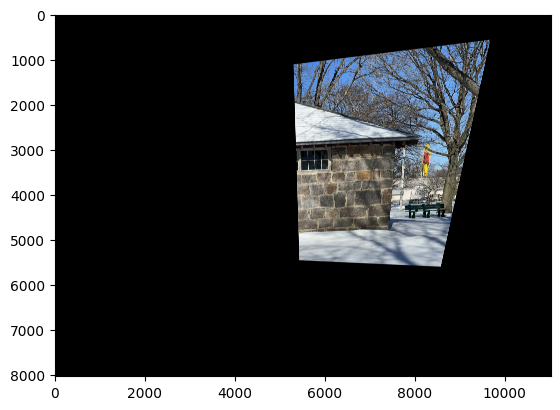

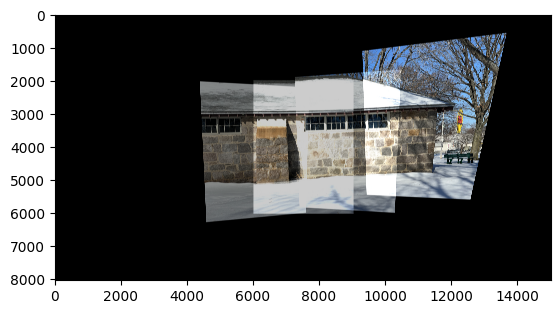

In [44]:
#wraping and blending of images
output_shape_1234 = (blended_234.shape[1],blended_234.shape[0])
warped_image_1234 = apply_homography(images[0],H_1234,output_shape_1234)
%matplotlib inline
plt.figure()
plt.imshow(cv2.cvtColor(warped_image_1234,cv2.COLOR_BGR2RGB))
plt.show()

blended_1234 = blend_images(warped_image_1234, blended_234, 1,0.8)
blended_1234 = add_border_img(blended_1234,0,0,4000,0,[0,0,0])
%matplotlib inline
plt.figure()
plt.imshow(cv2.cvtColor(blended_1234, cv2.COLOR_BGR2RGB))
plt.show()

In [49]:
points_12345 = []
points_12345.append(select_points(images[4],4))
points_12345.append(select_points(blended_1234, 4))
H_12345 = cal_homography_matrix(points_12345[0],points_12345[1])

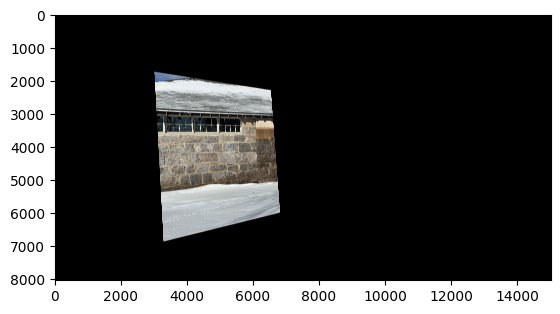

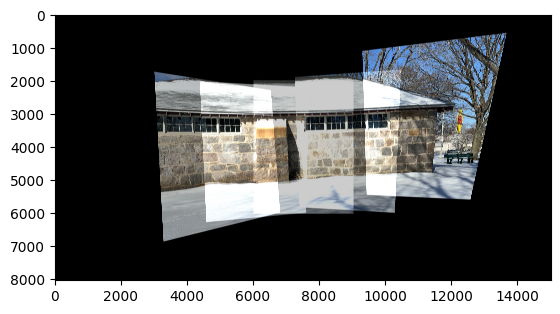

In [50]:
#wraping and blending of images
output_shape_12345 = (blended_1234.shape[1],blended_1234.shape[0])
warped_image_12345 = apply_homography(images[4],H_12345,output_shape_12345)
%matplotlib inline
plt.figure()
plt.imshow(cv2.cvtColor(warped_image_12345,cv2.COLOR_BGR2RGB))
plt.show()

blended_12345 = blend_images(warped_image_12345, blended_1234, 0.8,1)
%matplotlib inline
plt.figure()
plt.imshow(cv2.cvtColor(blended_12345, cv2.COLOR_BGR2RGB))
plt.savefig('blended_result.jpg')
plt.show()


How this method differs from the one in the papar by Burt and Adelson?

The main aim of both the methods is to combine images. The method used in Burt and Adelson focuses on using pyramid algorithm that deals with different resolution levels of images to ensure smooth transitions without comprimising details at varioud scales. The transition mainly depends on the scale of features on the image. The method used in this project is more of using interactive point selection and homography, which is more hands-on and requires user input to define corresponding points. It directly manipulates pixel values to achieve blending, which can be sensitive to the accuracy of selected points.
